$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: ** <br />
$\qquad$ $\qquad$$\qquad$$\qquad$ Adam Tonderski, 930524-1037, tadam@student.chalmers.se <br />
$\qquad$ $\qquad$$\qquad$$\qquad$ Britta Thörnblom, 900718-1341, brittat@student.chalmers.se <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

### [Solution]
The multivariate Gaussian distribution $N(\mu, \sigma^2I)$ of dimension $p$ has pdf:

$$ f(\vec{x}) = \frac{1}{\sqrt{(2\pi)^p \vert \sigma^2 I \vert}} \text{exp} \left(-1/2 (\vec{x} - \mu)^T(\sigma^2 I)^{-1}(\vec{x} - \mu) \right) $$

The joint log likelihood is given by (we can write write the a distribution for each dimension multiplied together since the problem states that the distribution is i.i.d.):

$\ln L = \ln \Pi_{i=0}^n f(\vec{x}_i) = \Sigma_{i=0}^n \ln f(\vec{x}_i)$

For a single $\vec{x}_i$ the log likelihood is:

$\ln f(\vec{x}_i) = \ln((2\pi)^{-p/2}) + \ln(\vert \sigma^2 I \vert^{-1/2}) -1/2 (\vec{x}_i - \mu)^T(\sigma^2 I)^{-1}(\vec{x}_i - \mu)$

Using $\vert \sigma^2 I \vert = \sigma^{2p}$ (from the definition of the determinant and the fact that this matrix only has nonzero elements on the diagonal and those values are all $=\sigma$) we can simplify this to:

$\ln f(\vec{x}_i) = -1/2\left( p \ln(2\pi) + p\ln(\sigma^2) + (\vec{x}_i - \mu)^T(\sigma^2 I)^{-1}(\vec{x}_i - \mu)\right)$

(note that $(\sigma^2 I)^{-1} = \sigma^{-2} I$)

Taking the derivative $\ln L $ with respect to $\sigma^2$ yields:

$ \frac{\partial ln(L)}{\partial \sigma^2} = -\frac{1}{2}\Sigma_{i=0}^n \left( \frac{p}{\sigma^2} - \frac{1}{(\sigma^2)^2} (\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right) $

Then we solve $ \frac{\partial ln(L)}{\partial \sigma^2} = 0$ for $\sigma^2$:

$\Sigma_{i=0}^n \left( \frac{1}{(\sigma^2)^2} (\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)=\frac{np}{\sigma^2}$

$\frac{1}{\sigma^2}\Sigma_{i=0}^n \left((\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)=np$

$\sigma^2=\frac{1}{np} \Sigma_{i=0}^n \left((\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)$

The maximum likelihood estimator for $\sigma^2$ is:

$\hat{\sigma^2}=\frac{1}{np} \Sigma_{i=0}^n \left((\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)$

An estimate for $\sigma$ can be achieved by taking the square root of this:

$\hat{\sigma}=  \sqrt{\frac{1}{np} \Sigma_{i=0}^n \left((\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)}$


## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to sphericalGaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

### [Solution]
#### [Finding the posterior]
Given the hint, we know that the posterior will be of form:

$ p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) = \frac{\beta_1^{\alpha_1}}{\Gamma (\alpha_1)} s^{-\alpha_1-1} \text{exp}\left( \frac{-\beta_1}{s}\right) \tag{2}$

We also know that 

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) \propto P(X_1 = x_1, \ldots, X_n = x_n \,|\, \sigma^{2}) \dot P(\sigma^{2} = s | \alpha, \beta)$

where 

$P(X_1 = x_1, \ldots, X_n = x_n \,|\, \sigma^{2}) = \Pi_{i=1}^n \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x_i - \mu)^{\top}(x_i - \mu) }{2\sigma^2} \right) = (\frac{1}{2 \pi \sigma^2})^n \exp \left( -\frac{\Sigma_{i=1}^n (x_i - \mu)^{\top}(x_i - \mu) }{2\sigma^2} \right) $

Using this, we multiply the joint likelihood $P(X_1 = x_1 \ldots, X_n = x_n \,|\, \sigma^{2})$ by the prior $P(\sigma^{2} = s | \alpha, \beta)$ and identify the parameters $\alpha, \beta$ of $P(s \, |\, \alpha, \beta)$:

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) \propto \frac{1}{(2\pi s)^n}   \exp
\left( -\frac{ \Sigma_{i=1}^n (x_i - \mu)^{\top}(x_i - \mu) }{2s} \right) \frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -\frac{\beta}{s}\right)~. $
 
Collecting non-exponential factors and multiplying the exponentials together:
 
$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) \propto \frac{1}{(2\pi s)^n} \frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp
\left( -\frac{ \Sigma_{i=1}^n (x_i - \mu)^{\top}(x_i - \mu) }{2s}  - \frac{\beta}{s}\right)~. $

The exponential of $s$ goes from $-\alpha-1$ to $-\alpha-1-n$ (from the denominator), and the factors of $1/s$ in the exponential are lumped together:

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) \propto \frac{1}{ (2\pi)^n} \frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1-n} \exp
\left( -\frac{1}{s} \left( \frac{ \Sigma_{i=1}^n (x_i - \mu)^{\top}(x_i - \mu) }{2}  + \beta\right)  \right)~. $

Everything occuring to the left of the first $s$ is just a scaling factor and can be safely removed since the normalizing factors will be determined by the final parameters. (Or in other words, we only care about the stuff that affects $s$).

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha_1, \beta_1) \propto s^{-\alpha-1-n} \exp \left( -\frac{1}{s} \left( \frac{ \Sigma_{i=1}^n(x_i - \mu)^{\top}(x_i - \mu) }{2}  + \beta\right)  \right)~. $

Now we use the inverse-gamma distribution set up from equation 2 and identify $\alpha_1$ and $\beta_1$:
 
$\frac{\beta_1^{\alpha_1}}{\Gamma (\alpha_1)} s^{-\alpha_1-1} \text{exp}\left( \frac{-\beta_1}{s}\right) \propto s^{-\alpha-1-n} \exp \left( -\frac{1}{s} \left( \frac{ \Sigma_{i=1}^n(x_i - \mu)^{\top}(x_i - \mu) }{2}  + \beta\right)  \right)~.$

Ocular inspection yields:

$\alpha_1 = \alpha  + n$

$\beta_1 = \frac{\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu)}{2}+ \beta$

Including scaling factors this gives us a posterior distribution:

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta) = \frac{\left(\frac{\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu) }{2}+ \beta\right)^{\alpha  + n}}{\Gamma (\alpha  + n)} s ^{-\alpha - 1-n} \text{exp}\left( \frac{-\left(\frac{\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu) }{2}+ \beta\right)}{s}\right)$

Cleaning this up a bit gives us:

$p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta) =\left(\frac{\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu) }{2}+ \beta\right)^{\alpha  + n} \frac{s ^{-\alpha - 1 -n}}{\Gamma (\alpha  + n)}  \text{exp}\left( -\frac{\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu) + 2\beta}{2s}\right)$

#### [Getting the MAP estimates]

The MAP estimate is equal to the mode of the posterior distribution. So now we are lucky for two reasons; we have a closed form of the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$ and it is of inverse-gamma form. The mode of an inverse-gamma distribution with parameters $\alpha_1, \beta_1$ has a simple closed form: $\frac{\beta_1}{\alpha_1+1}$.

##### [M_A]
With $\alpha =1$ and $\beta=1$ we get posterior parameter values:

$\alpha_1 = \alpha  + n = 1 + n$

$\beta_1  = \frac{2 + \Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu)}{2}$ 
    
We plug this into the definition of the inverse-gamma mode and get:

$\hat{\sigma}_\text{MAP}(x, \mu) = \frac{\beta_1}{\alpha_1+1} = \frac{2 + \Sigma_{i=1}^n (x-\mu)^T(x-\mu)}{2\cdot (1+n+1)} = \frac{2 + \Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu)}{2\cdot(2+n)}$

##### [M_B]
Same procedure as above, but now we have parameter values $\alpha = 10$ and $\beta= 1$:

$\alpha_1 = \alpha  + n = 10 + n$

$\beta_1  = \frac{2 + \Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu)}{2}$ 

Again we plug this into the mode definition and get:

$\hat{\sigma}_\text{MAP}(x, \mu) = \frac{\beta_1}{\alpha_1+1} = \frac{2+\Sigma_{i=1}^n(x_i-\mu)^T(x_i-\mu)}{2\cdot(11+n)}$


# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here, or mention in pdf. This [link](http://data-blog.udacity.com/posts/2016/10/latex-primer/) might be useful if you choose to write here).

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

### [Solution]

#### Mean
The mean is calculated as:

$\mu = \frac{1}{n}\Sigma_{i=0}^n \vec{x}_i$

besides being the good old definition of the mean, it can be derived using MLE:

$\ln f(\vec{x}_i) = -1/2\left( p \ln(2\pi) + p\ln(\sigma^2) + (\vec{x}_i - \mu)^T(\sigma^2 I)^{-1}(\vec{x}_i - \mu)\right) = -1/2\left( p \ln(2\pi) + p\ln(\sigma^2) + \frac{1}{\sigma^2}(\vec{x}_i - \mu)^T(\vec{x}_i - \mu)\right)$ 

Taking the derivative of $\ln L $ with respect to $\mu$ yields:

$ \frac{\partial ln(L)}{\partial \mu} = \frac{-2}{\sigma^2}\Sigma_{i=0}^n (\vec{x}_i - \mu) $

Then we solve $ \frac{\partial ln(L)}{\partial \mu} = 0$ for $\mu$:

$\frac{-2}{\sigma^2}\Sigma_{i=0}^n (\vec{x}_i - \mu) = 0$

separating the $\mu$ from $\vec{x}_i$ in the sum gives us:

$\Sigma_{i=0}^n \vec{x}_i = n \mu$

which boils down to:

$\hat{\mu} = \frac{1}{n}\Sigma_{i=0}^n \vec{x}_i$

#### Standard deviation
From theoretical problem 1 we already know that for a spherical Gaussian it holds that:

$\hat{\sigma}=\sqrt{\frac{1}{np} \Sigma_{i=0}^n \left((\vec{x}_i - \mu)^T(\vec{x}_i - \mu) \right)}$

### [Comments]
In the resulting plot we can see that the data is clearly not i.i.d, which causes our approximation to be quite poor. This can be seen by the fact the data is aligned diagonally which means that the dimension are dependent. Also our fit is not the greatest since the number of points that lie outside 1 and 2 standard deviations is quite large.

Nevertheless, the MLE does a good job given the poor assumption about the shape of the distribution. The reason we say it does a good job is that the estimated mean is in the center of the data and very few points lie outside the third standard deviation.


(array([526.37988827, 419.97486034]), 96.97409694363417)
515
161
30


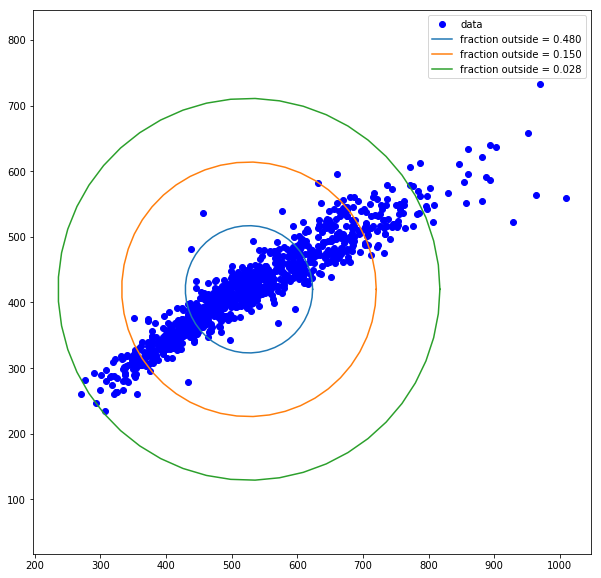

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def sge(X):
    """
    SGE Mean and variance estimator for spherical Gaussian distribution

    X : Data matrix of size n x p where each row represents a p-dimensional data point
    e.g. X = [ 2 1 ; 3 7 ; 4 5 ] is a dataset having 3 samples having two co−ordinates each.
    mu : Estimated mean o f the dataset [mu_1 mu_2 . . . mu_p]
    sigma : Estimated standard deviation of the dataset ( number )
    """
    n=X.shape[0]
    p=X.shape[1]
    mu = 0
    # silly loop since we can't use build in functions...
    for values in X:
        mu += values / n
    diffs = X - mu
    variance  = 0
    # same again
    for diff in diffs:
        variance += 1/(n*p) * diff.dot(diff.T)
    return mu, np.sqrt(variance)


def myplot1(data):
    plt.figure(figsize=(10,10))
    mu, sigma = sge(data)
    plt.plot(data[:,0], data[:,1], 'bo')
    legends = ["data"]
    for r in range(1,4):
        thetas = np.linspace(0,2*np.pi)
        radius = r*sigma
        plt.plot(mu[0] + radius*np.cos(thetas), mu[1] + radius*np.sin(thetas))
        num_outside = np.sum(np.linalg.norm(data - mu, axis=1) > radius)
        legends.append("fraction outside = %.3f" % (num_outside/len(data[:,0])))
    plt.legend(legends)
    plt.axis('equal')

data = np.loadtxt('dataset0.txt')
data = data[:,:2]
print(sge(data))
myplot1(data)


## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".
   
### [Comments]
While the two priors are quite different, their two resulting posterior distributions are almost identical. This is explained by the influence of the data points overshadowing that from the prior distributions'. One indicator of this result is that the MAP estimates calculated in the second theoretical problem are very similar even though one of the prior parameters $\alpha$ has been upscaled by a factor 10. The two MAP estimates are included in the plots of their respective posterior distribution and (as expected) they both coincide with the mode of their respective posterior distribution. Using the first parameter set we get $\approx 9386.5$ and the second $\approx 9308.6$. So changing the parameter $\alpha$ by a factor 10 has decreased the MAP estimate by 9386.5-9308.6 = 77.9. Compared to the initial MAP estimated this is a relative decrease of only $77.9/9386.5 \approx 0.0082992$ or $.82992\%$.  

So the parameters of the prior will largely be drenched by the information contained in the data samples, however it is possible to see traces of the assumptions of the prior. The small difference that we can see is that with the upscaled $\alpha$ (the narrower and latter of the two priors) the posterior and it's mode is slightly shifted to the left. Or in other words: when the prior is narrowly centered around values super close to 0, the posterior will also be centered on (slightly) smaller values.

Furthermore, an argument could be made that if someone used these priors they must have made an incorrect assumption. They don't seem to be a good guess on the behaviour of the data, but are still quite specific (if one does not have enough knowledge to choose a suitable prior, an uninformed prior such as a Gaussian or uniform distribution might be better). 

[526.37988827 419.97486034]
first sample var
9386.496899077902
second sample var
9308.63655613624


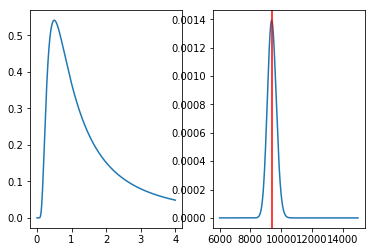

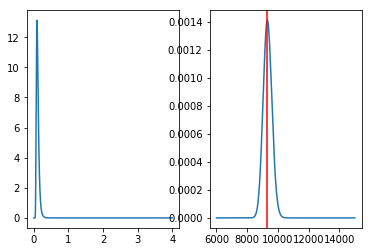

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

data = np.loadtxt('dataset0.txt', dtype='float64')
data = data[:,:2]
n = data.shape[0]

mu = np.mean(data, axis=0)
print(mu)

a_1=1
b_1=1
a_2=10
b_2=1

diffs = data - np.mean(data,axis=0)

diff_list = list(map(np.sum, list(map(np.square, diffs))))

print("first sample var")
sample_var_1 = (2+np.sum(diff_list))/(2*(2+n))
print(sample_var_1)

print("second sample var")
sample_var_2 = (2+np.sum(diff_list))/(2*(11+n))
print(sample_var_2)


def log_inverse_gamma(s, a, b, logb):
    return a*logb - scipy.special.gammaln(a) + (-a-1)*np.log(s) - b/s
vec_log_inv = np.vectorize(log_inverse_gamma, excluded=(1,2,3))

def calculate_logb(beta):
    diffs = data - np.mean(data,axis=0)
    # log-sum-exp magic
    maxexponent = float('-inf')
    for diff in diffs:
        exponent = np.log(diff.dot(diff)/2 + beta/n)
        if exponent > maxexponent:
            maxexponent = exponent
    exp_sum = 0
    for diff in diffs:
        exp_sum += np.exp(np.log(diff.dot(diff)/2 + beta/n) - maxexponent)
    return maxexponent + np.log(exp_sum)

def calculate_b(beta):
    diffs = data - np.mean(data,axis=0)
    diff_sum = 0
    for diff in diffs:
        diff_sum += diff.dot(diff)
    return beta + diff_sum/2

prior_sigma = np.linspace(0.001,4, 100000)
posterior_sigma = np.linspace(6000,15000, 100000)

beta=1
b = calculate_b(beta)
logb = calculate_logb(beta)

#Case 1
alpha=1
a = alpha + n

prior = vec_log_inv(prior_sigma, alpha, beta, np.log(beta))
posterior = vec_log_inv(posterior_sigma, a, b, logb)

plt.figure(figsize=(10,5))
plt.suptitle(r'First param set ($\alpha=1$, $\beta=1$)')
plt.subplot(121)
plt.title('prior')
plt.plot(prior_sigma, np.exp(prior))
plt.subplot(122)
plt.title('posterior')
plt.plot(posterior_sigma, np.exp(posterior))
plt.axvline(x=sample_var_1, color='r')

#Case 2
alpha= 10
a = alpha + n

prior = vec_log_inv(prior_sigma, alpha, beta, np.log(beta))
posterior = vec_log_inv(posterior_sigma, a, b, logb)
plt.figure(figsize=(10,5))
plt.suptitle(r'Second param set ($\alpha=10$, $\beta=1$)')
plt.subplot(121)
plt.title('prior')
plt.plot(prior_sigma, np.exp(prior))
plt.subplot(122)
plt.title('posterior')
plt.plot(posterior_sigma, np.exp(posterior))
plt.axvline(x=sample_var_2, color='r')
